In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
# Load the dataset
file_path = 'Machine Downtime.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [5]:
# Data Cleaning
# Handle missing values by filling them with the median of each column
data.fillna(data.median(numeric_only=True), inplace=True)


In [6]:
# Convert categorical target variable to binary encoding
data['Downtime'] = data['Downtime'].map({'Machine_Failure': 1, 'No_Failure': 0})


In [7]:
# Drop unnecessary columns
columns_to_drop = ['Date', 'Machine_ID', 'Assembly_Line_No']
data = data.drop(columns=columns_to_drop, axis=1)

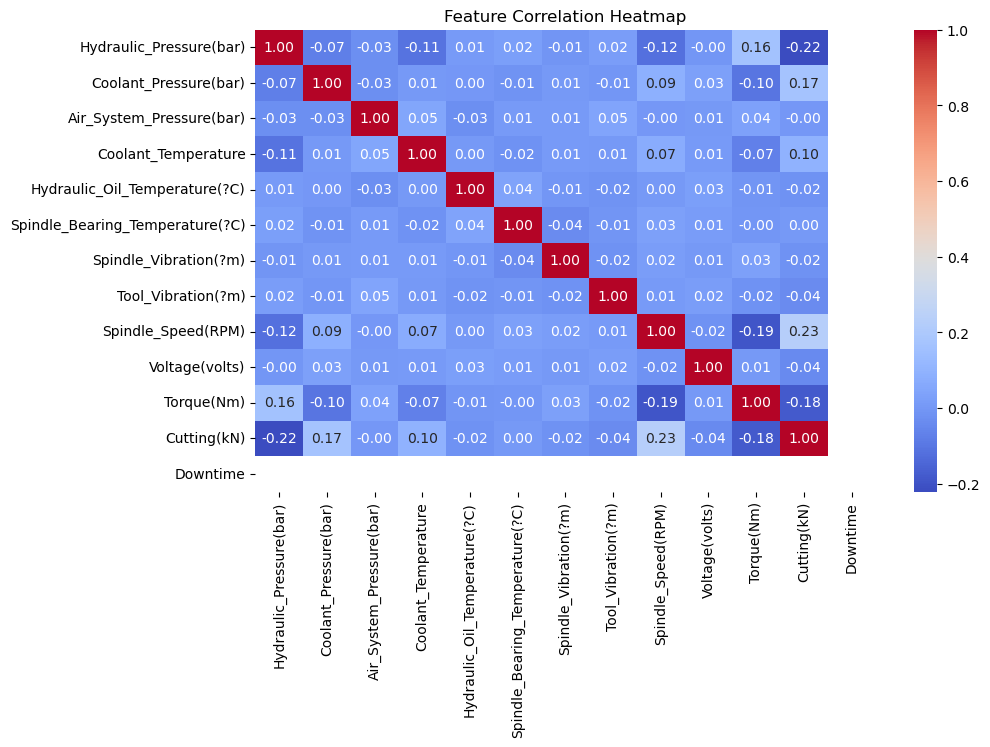

In [8]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
# Splitting the dataset into features and target variable
X = data.drop('Downtime', axis=1)
y = data['Downtime']

In [15]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
data['Downtime'].fillna(0, inplace=True)


In [17]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       269
         1.0       0.99      0.99      0.99       231

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



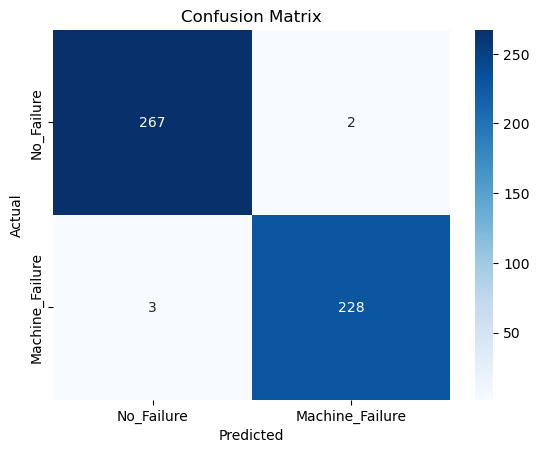

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No_Failure', 'Machine_Failure'], yticklabels=['No_Failure', 'Machine_Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [20]:
import json


In [21]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
report_json = json.dumps(report, indent=4)
print(report_json)


{
    "0.0": {
        "precision": 0.9888888888888889,
        "recall": 0.9925650557620818,
        "f1-score": 0.9907235621521336,
        "support": 269.0
    },
    "1.0": {
        "precision": 0.991304347826087,
        "recall": 0.987012987012987,
        "f1-score": 0.9891540130151845,
        "support": 231.0
    },
    "accuracy": 0.99,
    "macro avg": {
        "precision": 0.990096618357488,
        "recall": 0.9897890213875344,
        "f1-score": 0.989938787583659,
        "support": 500.0
    },
    "weighted avg": {
        "precision": 0.9900048309178744,
        "recall": 0.99,
        "f1-score": 0.9899984304508631,
        "support": 500.0
    }
}


In [23]:
conf_matrix_dict = {
    "No_Failure": {
        "No_Failure": int(conf_matrix[0][0]),
        "Machine_Failure": int(conf_matrix[0][1])
    },
    "Machine_Failure": {
        "No_Failure": int(conf_matrix[1][0]),
        "Machine_Failure": int(conf_matrix[1][1])
    }
}
conf_matrix_json = json.dumps(conf_matrix_dict, indent=4)
print(conf_matrix_json)


{
    "No_Failure": {
        "No_Failure": 267,
        "Machine_Failure": 2
    },
    "Machine_Failure": {
        "No_Failure": 3,
        "Machine_Failure": 228
    }
}
